<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/initial-data-modelling/crypto_price_predictor_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
!pip install yfinance
!pip install prophet


In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

%matplotlib inline


# Date Input and Validation

In this section, we will implement a function that prompts the user to enter a date in the `YYYY-MM-DD` format. The function will validate the input and ensure that it is correctly formatted.

If the user enters an invalid date format, they will be given up to three attempts to enter a valid date. If they fail to provide a valid date after three attempts, the program will default to the date `2024-01-01`.

The function will then calculate the number of days from the entered (or defaulted) date to today's date.


In [364]:
from datetime import datetime

start_date='2017-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')

print(f"Today's date in YYYY-MM-DD format: {today_date}")

Today's date in YYYY-MM-DD format: 2024-11-13


In [365]:

# Declare slice_date as a global variable
slice_date = ''

# Function to validate date format and calculate period value
def get_period_value():
    global slice_date  # Use the global variable
    attempts = 0
    max_attempts = 3

    while attempts < max_attempts:
        # Ask user for slice date
        slice_date = input(f"To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after {start_date} but before {today_date}: ")

        # Validate the date format
        try:
            # Attempt to parse the date
            parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')
            break  # Exit the loop if the date is valid
        except ValueError:
            attempts += 1
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
            if attempts == max_attempts:
                print("Maximum attempts reached. Defaulting to 2024-01-01.")
                slice_date = '2024-01-01'
                parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')

    # Calculate the number of days from the slice date to today
    today = datetime.today()
    period_value = (today - parsed_date).days

    return period_value

In [366]:
crypto_symbol = 'BTC-USD'
crypto_symbol = input("Enter crypto symbol: ").upper()
print(f"Crypto Symbol: {crypto_symbol}")

Enter crypto symbol: BTC-USD
Crypto Symbol: BTC-USD


In [367]:
period_value = get_period_value()
if period_value is not None:
    print(f"Number of days from {slice_date} to today: {period_value}")

To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after 2017-01-01 but before 2024-11-13: 2024-10-01
Number of days from 2024-10-01 to today: 43


In [368]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download(crypto_symbol, start=start_date, end=today_date)
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
display(btc.head())
display(btc.tail())

# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-01-01 00:00:00+00:00,998.325012,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02 00:00:00+00:00,1021.750000,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03 00:00:00+00:00,1043.839966,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04 00:00:00+00:00,1154.729980,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05 00:00:00+00:00,1013.380005,1013.380005,1191.099976,910.416992,1156.729980,510199008


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-07 00:00:00+00:00,75904.859375,75904.859375,76943.117188,74480.421875,75637.085938,63467654989
2024-11-08 00:00:00+00:00,76545.476562,76545.476562,77252.750000,75648.742188,75902.835938,55176858003
2024-11-09 00:00:00+00:00,76778.867188,76778.867188,76932.765625,75773.789062,76556.187500,29009480361
2024-11-10 00:00:00+00:00,80474.187500,80474.187500,81474.421875,76565.429688,76775.546875,82570594495
2024-11-11 00:00:00+00:00,88701.484375,88701.484375,89604.500000,80283.250000,80471.414062,117966845037


In [369]:
btc.dropna(inplace=True)
crypto_data = btc.loc[:slice_date, 'Close']
display(crypto_data.head())
display(crypto_data.tail())


Ticker,BTC-USD
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


Ticker,BTC-USD
Date,
2024-09-27 00:00:00+00:00,65790.664062
2024-09-28 00:00:00+00:00,65887.648438
2024-09-29 00:00:00+00:00,65635.304688
2024-09-30 00:00:00+00:00,63329.500000
2024-10-01 00:00:00+00:00,60837.007812


<Axes: xlabel='Date'>

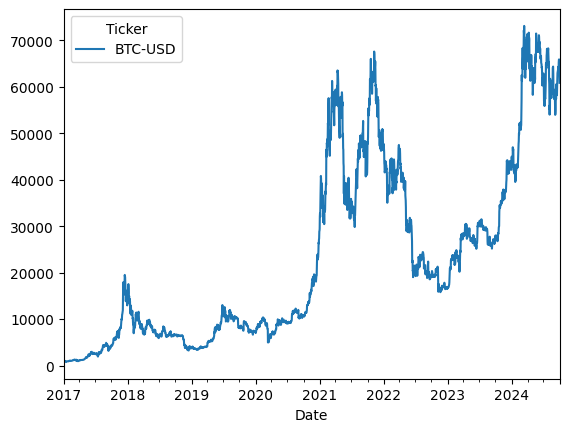

In [370]:
crypto_data.plot()

In [371]:
crypto_data = crypto_data.reset_index()


In [372]:
display(crypto_data.head())
display(crypto_data.tail())

Ticker,Date,BTC-USD
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,Date,BTC-USD
2826,2024-09-27 00:00:00+00:00,65790.664062
2827,2024-09-28 00:00:00+00:00,65887.648438
2828,2024-09-29 00:00:00+00:00,65635.304688
2829,2024-09-30 00:00:00+00:00,63329.500000
2830,2024-10-01 00:00:00+00:00,60837.007812


In [373]:
crypto_df = crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

In [374]:
display(crypto_df.head())
display(crypto_df.tail())

Ticker,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,ds,y
2826,2024-09-27 00:00:00+00:00,65790.664062
2827,2024-09-28 00:00:00+00:00,65887.648438
2828,2024-09-29 00:00:00+00:00,65635.304688
2829,2024-09-30 00:00:00+00:00,63329.500000
2830,2024-10-01 00:00:00+00:00,60837.007812


In [375]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2831 non-null   datetime64[ns, UTC]
 1   y       2831 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 44.4 KB


In [376]:
crypto_model = Prophet()

In [377]:
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/5g1_1bax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/l5wtce14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4392', 'data', 'file=/tmp/tmph42srkge/5g1_1bax.json', 'init=/tmp/tmph42srkge/l5wtce14.json', 'output', 'file=/tmp/tmph42srkge/prophet_modeloxishz0f/prophet_model-20241113030044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:00:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [378]:
future_trends = crypto_model.make_future_dataframe(periods=period_value, freq="D")


In [379]:
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-2748.948152,-8243.464405,3386.476165,-2748.948152,-2748.948152,425.124450,425.124450,425.124450,-9.341530,-9.341530,-9.341530,434.465979,434.465979,434.465979,0.0,0.0,0.0,-2323.823702
1,2017-01-02,-2714.384047,-7779.961520,4301.400664,-2714.384047,-2714.384047,561.670204,561.670204,561.670204,51.372611,51.372611,51.372611,510.297593,510.297593,510.297593,0.0,0.0,0.0,-2152.713843
2,2017-01-03,-2679.819942,-8488.597130,3687.369966,-2679.819942,-2679.819942,551.223659,551.223659,551.223659,-23.522353,-23.522353,-23.522353,574.746012,574.746012,574.746012,0.0,0.0,0.0,-2128.596283
3,2017-01-04,-2645.255836,-7561.912149,4023.552496,-2645.255836,-2645.255836,666.562452,666.562452,666.562452,40.152431,40.152431,40.152431,626.410021,626.410021,626.410021,0.0,0.0,0.0,-1978.693384
4,2017-01-05,-2610.691731,-8165.566455,3935.492018,-2610.691731,-2610.691731,639.856630,639.856630,639.856630,-24.261164,-24.261164,-24.261164,664.117794,664.117794,664.117794,0.0,0.0,0.0,-1970.835101


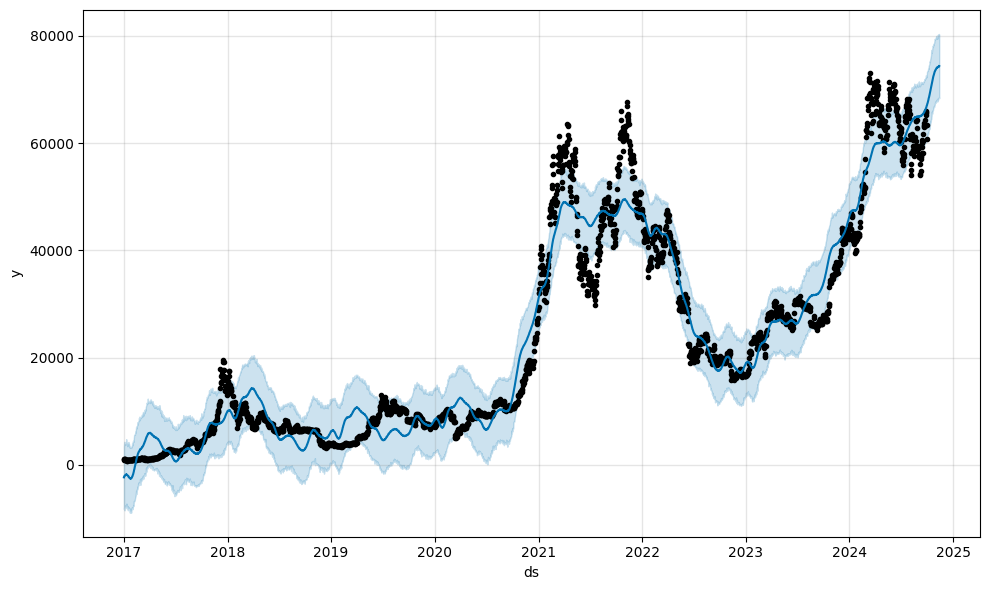

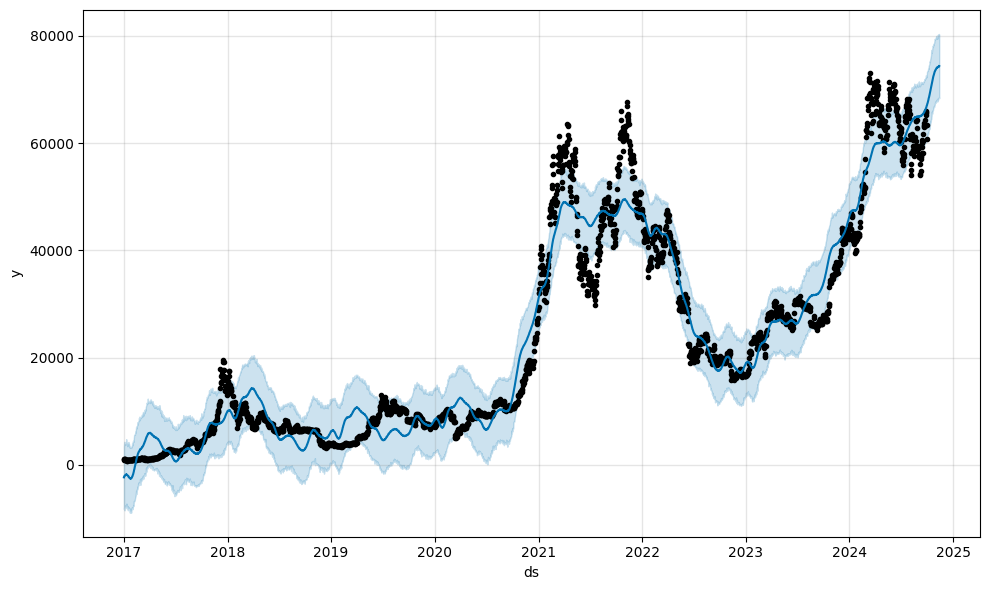

In [380]:
crypto_model.plot(forecast_trends)

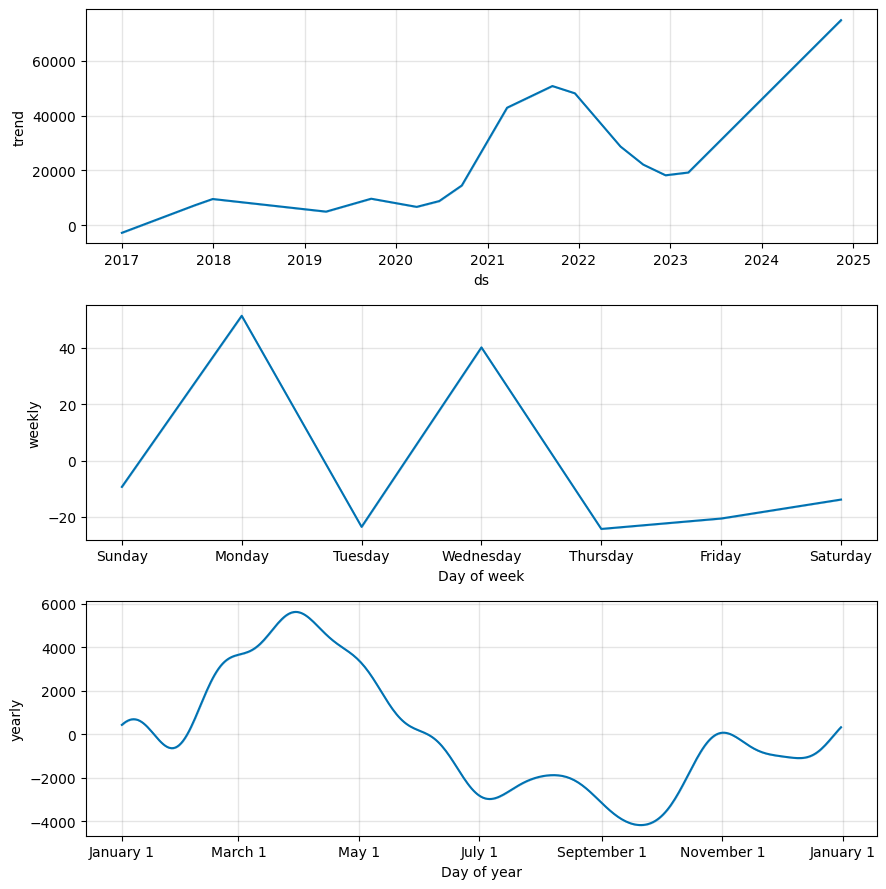

In [381]:
figures = crypto_model.plot_components(forecast_trends)

In [382]:
forecast_trends= forecast_trends[['ds','yhat']]

In [383]:
forecast_trends.set_index('ds', inplace=True)


In [384]:
# reduce the slice_date by period value into another variable

reduced_date = pd.to_datetime(slice_date) - pd.DateOffset(days=period_value)

# compare reduced_date with start_date and see which one is later and keep that date in reduced_date
if reduced_date < pd.to_datetime(start_date):
    reduced_date = pd.to_datetime(start_date)

reduced_date_str = reduced_date.strftime('%Y-%m-%d')
print(f"Reduced Date: {reduced_date_str} and Slice Date: {slice_date}")



Reduced Date: 2024-08-19 and Slice Date: 2024-10-01


In [385]:
forecast_dataframe = forecast_trends.loc[reduced_date:].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
display (forecast_dataframe.head())





,yhat
ds,
2024-08-19,64801.763760
2024-08-20,64760.991398
2024-08-21,64853.859137
2024-08-22,64813.950537
2024-08-23,64837.777744


In [386]:
real_values_for_compare_df = btc.loc[reduced_date_str:, 'Close'].copy()
# real_values_for_compare_df = real_values_for_compare_df.reset_index()
real_values_for_compare_df = real_values_for_compare_df.reset_index()
# real_2024.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)

real_values_for_compare_df['Date'] = real_values_for_compare_df['Date'].dt.tz_localize(None)

display(real_values_for_compare_df.head())

Ticker,Date,BTC-USD
0,2024-08-19,59493.453125
1,2024-08-20,59012.792969
2,2024-08-21,61175.191406
3,2024-08-22,60381.914062
4,2024-08-23,64094.355469


In [387]:
real_values_for_compare_df = real_values_for_compare_df.set_index('Date')


In [388]:
display(real_values_for_compare_df.head())
display(real_values_for_compare_df.tail())

Ticker,BTC-USD
Date,
2024-08-19,59493.453125
2024-08-20,59012.792969
2024-08-21,61175.191406
2024-08-22,60381.914062
2024-08-23,64094.355469


Ticker,BTC-USD
Date,
2024-11-07,75904.859375
2024-11-08,76545.476562
2024-11-09,76778.867188
2024-11-10,80474.187500
2024-11-11,88701.484375


In [389]:
# merge the 2 dataframes

merged_for_comparsion_df = real_values_for_compare_df.join(forecast_dataframe, how='inner')
display(merged_for_comparsion_df.head())
display(merged_for_comparsion_df.tail())


,BTC-USD,yhat
2024-08-19,59493.453125,64801.763760
2024-08-20,59012.792969,64760.991398
2024-08-21,61175.191406,64853.859137
2024-08-22,60381.914062,64813.950537
2024-08-23,64094.355469,64837.777744


,BTC-USD,yhat
2024-11-07,75904.859375,74087.604249
2024-11-08,76545.476562,74128.257869
2024-11-09,76778.867188,74167.980571
2024-11-10,80474.187500,74202.824103
2024-11-11,88701.484375,74292.502764


In [390]:
merged_for_comparsion_df.rename(columns={crypto_symbol:'Actual Price', 'yhat':'Predicted Price'}, inplace=True)
display(merged_for_comparsion_df)



,Actual Price,Predicted Price
2024-08-19,59493.453125,64801.763760
2024-08-20,59012.792969,64760.991398
2024-08-21,61175.191406,64853.859137
2024-08-22,60381.914062,64813.950537
2024-08-23,64094.355469,64837.777744
...,...,...
2024-11-07,75904.859375,74087.604249
2024-11-08,76545.476562,74128.257869
2024-11-09,76778.867188,74167.980571
2024-11-10,80474.187500,74202.824103


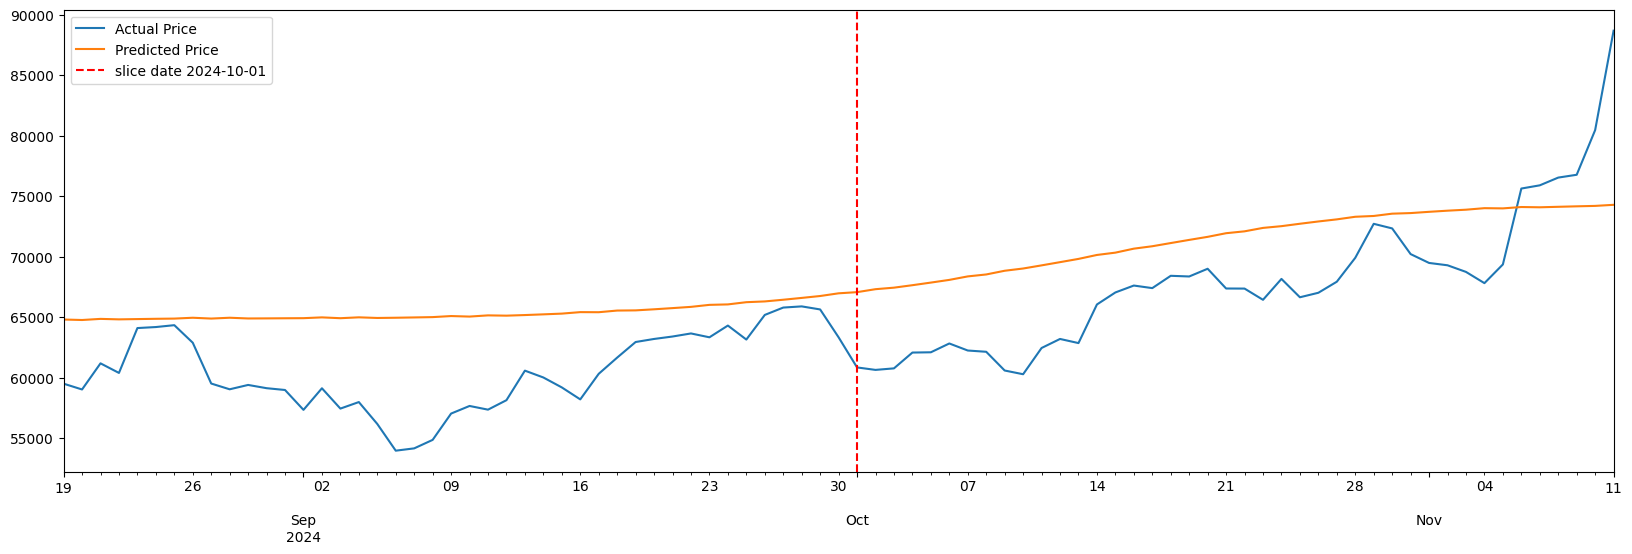

<Axes: >

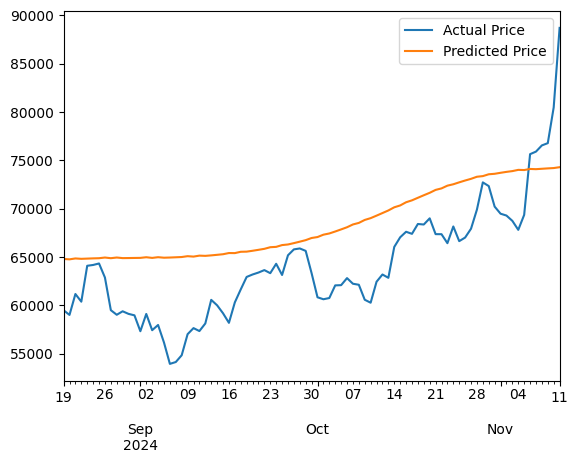

In [391]:
# Plot the DataFrame with a larger figure size
fig, ax = plt.subplots(figsize=(20, 6))  # Change the width and height as needed
merged_for_comparsion_df.plot(ax=ax)
label_date = f"slice date {slice_date}"
plt.axvline(x=pd.to_datetime(slice_date), color='red', linestyle='--', label=label_date)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()
merged_for_comparsion_df.plot()


# Now for the fun part... Buy or Sell ?

  - Determine Buy/Sell Signals: After making predictions, you need to establish criteria for when to buy or sell based on the forecasted prices. For example, you could decide to buy if the forecasted price is significantly higher than the last known price and sell if it is lower.

  - Create Buy/Sell Data: Create a new DataFrame that holds the dates and corresponding buy/sell signals.

  - Plot the Forecast and Indicators: Use Matplotlib to plot the forecast and overlay the buy/sell indicators on the graph.


In [392]:
full_crypto_data = btc.loc[:, 'Close'].copy()

full_crypto_data = full_crypto_data.reset_index()

full_crypto_data = full_crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

full_crypto_data['ds'] = full_crypto_data['ds'].dt.tz_localize(None)

display(full_crypto_data.head())
display(full_crypto_data.tail())

Ticker,ds,y
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005


Ticker,ds,y
2867,2024-11-07,75904.859375
2868,2024-11-08,76545.476562
2869,2024-11-09,76778.867188
2870,2024-11-10,80474.187500
2871,2024-11-11,88701.484375


In [393]:
model = Prophet()
model.fit(full_crypto_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/3u_cgpsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/4fzkanww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99511', 'data', 'file=/tmp/tmph42srkge/3u_cgpsc.json', 'init=/tmp/tmph42srkge/4fzkanww.json', 'output', 'file=/tmp/tmph42srkge/prophet_modeldw4gyl0d/prophet_model-20241113030050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:00:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:00:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [394]:
# Determine buy/sell signals
buy_signals = []
sell_signals = []
#last_price = full_crypto_data['y'].iloc[-1]
last_60_rows = forecast.iloc[-60:]

tomorrow_price = last_60_rows['yhat'].iloc[-30]
month_later_price = last_60_rows['yhat'].iloc[-1]
print(f"{tomorrow_price} -> {month_later_price}")

# prompt percentage change between tomorrow_price and month_later_price
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100
print(f"Percentage change: {percentage_change:.2f}%")


73961.57333159604 -> 76048.97004266075
Percentage change: 2.82%


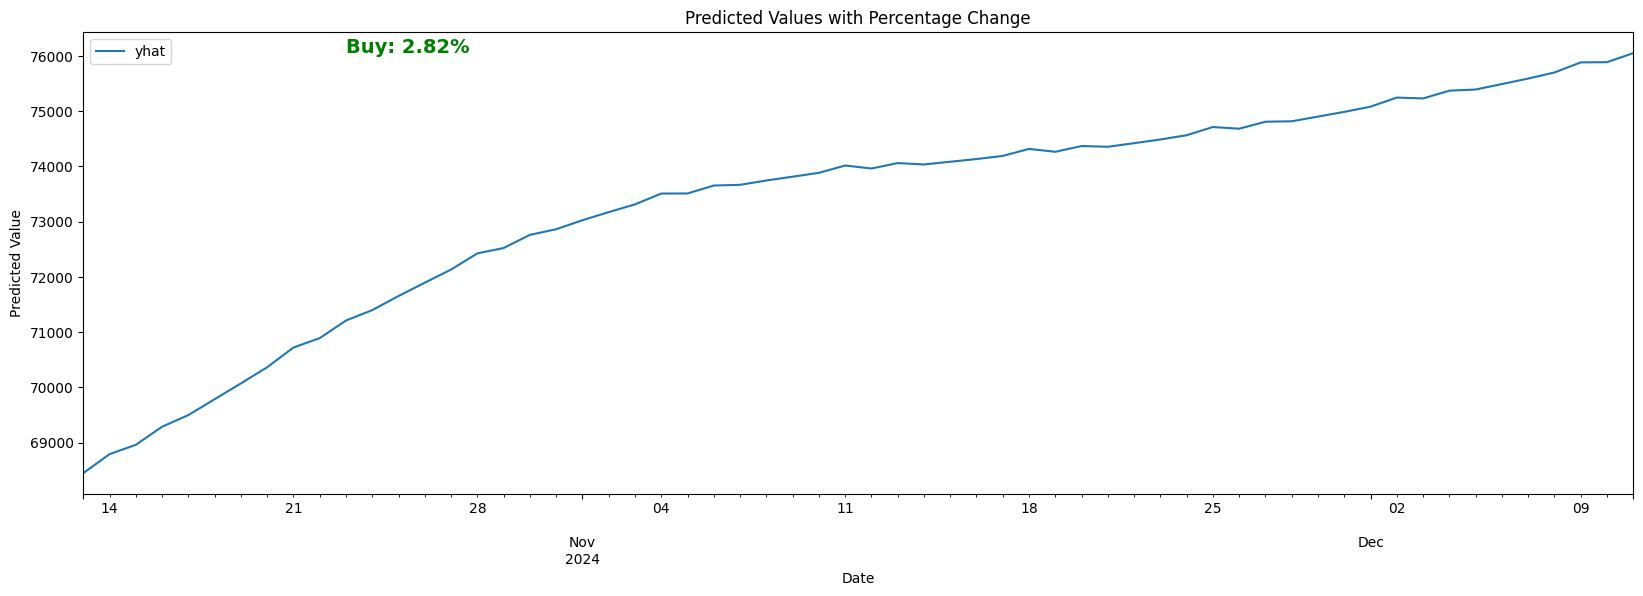

In [395]:
last_60_rows.plot(x='ds', y='yhat', figsize=(20, 6))

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the percentage change value to the plot
if(percentage_change > 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

plt.title('Predicted Values with Percentage Change')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.show()
